# Data Cleaning & Analysis 
### Employee Exit Surveys:  
    Department Of Education, Training and Employment(DETE):  
    https://data.gov.au/dataset/ds-qld-fe96ff30-d157-4a81-851d-215f2a0fe26d/details?q=exit%20survey
    Technical and Further Education (TAFE):  
    https://data.gov.au/dataset/ds-qld-89970a3b-182b-41ea-aea2-6f9f17b5907e/details?q=exit%20survey

 ### Questions to ask:

<div style="font-size: 19px">
Are employees who only worked for the institutes for a short period of time resigning due to some kind of dissatisfaction? What about employees who have been there longer?        

Are younger employees resigning due to some kind of dissatisfaction? What about older employees?

dete_survey.csv

* ID: An id used to identify the participant of the survey
* SeparationType: The reason why the person's employment ended
* Cease Date: The year or month the person's employment ended
* DETE Start Date: The year the person began employment with the DETE

tafe_survey.csv

* Record ID: An id used to identify the participant of the survey
* Reason for ceasing employment: The reason why the person's employment ended
* LengthofServiceOverall. Overall Length of Service at Institute (in years): The length of the person's employment (in years)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
dete_survey = pd.read_csv('dete_survey.csv', na_values = 'Not Stated')
tafe_survey = pd.read_csv('tafe_survey.csv')

tafe_survey has columns with long names  
both tafe_survey and dete_survey missing a lot of values

In [3]:
dete_survey.info()
tafe_survey.info()
dete_survey.head(2)
tafe_survey.head(2)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 822 entries, 0 to 821
Data columns (total 56 columns):
ID                                     822 non-null int64
SeparationType                         822 non-null object
Cease Date                             788 non-null object
DETE Start Date                        749 non-null float64
Role Start Date                        724 non-null float64
Position                               817 non-null object
Classification                         455 non-null object
Region                                 717 non-null object
Business Unit                          126 non-null object
Employment Status                      817 non-null object
Career move to public sector           822 non-null bool
Career move to private sector          822 non-null bool
Interpersonal conflicts                822 non-null bool
Job dissatisfaction                    822 non-null bool
Dissatisfaction with the department    822 non-null bool
Physical work envir

,Record ID,Institute,WorkArea,CESSATION YEAR,Reason for ceasing employment,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,...,Workplace. Topic:Does your workplace promote a work culture free from all forms of unlawful discrimination?,Workplace. Topic:Does your workplace promote and practice the principles of employment equity?,Workplace. Topic:Does your workplace value the diversity of its employees?,Workplace. Topic:Would you recommend the Institute as an employer to others?,Gender. What is your Gender?,CurrentAge. Current Age,Employment Type. Employment Type,Classification. Classification,LengthofServiceOverall. Overall Length of Service at Institute (in years),LengthofServiceCurrent. Length of Service at current workplace (in years)
0,6.341330e+17,Southern Queensland Institute of TAFE,Non-Delivery (corporate),2010.0,Contract Expired,NaN,NaN,NaN,NaN,NaN,...,Yes,Yes,Yes,Yes,Female,26 30,Temporary Full-time,Administration (AO),1-2,1-2
1,6.341337e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Retirement,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
dete_survey.head(2)

,ID,SeparationType,Cease Date,DETE Start Date,Role Start Date,Position,Classification,Region,Business Unit,Employment Status,...,Kept informed,Wellness programs,Health & Safety,Gender,Age,Aboriginal,Torres Strait,South Sea,Disability,NESB
0,1,Ill Health Retirement,08/2012,1984.0,2004.0,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,NaN,NaN,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,NaN


Drop unnecessary columns
* Keep the columns where dete_survey = tafe_survey

In [5]:
dete_survey_updated = dete_survey.drop(dete_survey.columns[28:49], axis=1)

In [6]:
tafe_survey_updated = tafe_survey.drop(tafe_survey.columns[17:66], axis=1)

Rename columns in dete_survey_updated


In [7]:
dete_survey_updated.columns = dete_survey_updated.columns.str.strip().str.replace(' ','_').str.lower()

In [8]:
dete_survey_updated.columns

Index(['id', 'separationtype', 'cease_date', 'dete_start_date',
       'role_start_date', 'position', 'classification', 'region',
       'business_unit', 'employment_status', 'career_move_to_public_sector',
       'career_move_to_private_sector', 'interpersonal_conflicts',
       'job_dissatisfaction', 'dissatisfaction_with_the_department',
       'physical_work_environment', 'lack_of_recognition',
       'lack_of_job_security', 'work_location', 'employment_conditions',
       'maternity/family', 'relocation', 'study/travel', 'ill_health',
       'traumatic_incident', 'work_life_balance', 'workload',
       'none_of_the_above', 'gender', 'age', 'aboriginal', 'torres_strait',
       'south_sea', 'disability', 'nesb'],
      dtype='object')

Rename columns in tafe_survey_updated  
match some column names to column names in dete_survey

In [9]:
to_rename = {'Record ID': 'id', 'CESSATION YEAR': 'cease_date', \
             'Reason for ceasing employment': 'separationtype', 'Gender. What is your Gender?'\
             : 'gender', 'CurrentAge. CurrentAge': 'age', 'Employment Type. Employment Type'\
             : 'employment_status', 'Classification. Classification': 'position',\
             'LengthofServiceOverall. Overall Length of Service at Institute (in years)': 'institute_service', 'LengthofServiceCurrent. Length of Service at current workplace (in years)': 'role_service'}

tafe_survey_updated.rename(to_rename, axis = 1, inplace = True)

Find the reasons as to why employee was 'separated'  
Find resignation, as our question only deals with those who resigned  
create dete_resignations & tafe_resignations

In [10]:
tafe_survey_updated['separationtype'].value_counts()

Resignation                 340
Contract Expired            127
Retrenchment/ Redundancy    104
Retirement                   82
Transfer                     25
Termination                  23
Name: separationtype, dtype: int64

In [11]:
dete_survey_updated['separationtype'].value_counts()

Age Retirement                          285
Resignation-Other reasons               150
Resignation-Other employer               91
Resignation-Move overseas/interstate     70
Voluntary Early Retirement (VER)         67
Ill Health Retirement                    61
Other                                    49
Contract Expired                         34
Termination                              15
Name: separationtype, dtype: int64

In [12]:
tafe_survey_updated

,id,Institute,WorkArea,cease_date,separationtype,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,...,Contributing Factors. Study,Contributing Factors. Travel,Contributing Factors. Other,Contributing Factors. NONE,gender,CurrentAge. Current Age,employment_status,position,institute_service,role_service
0,6.341330e+17,Southern Queensland Institute of TAFE,Non-Delivery (corporate),2010.0,Contract Expired,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Female,26 30,Temporary Full-time,Administration (AO),1-2,1-2
1,6.341337e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Retirement,-,-,-,-,-,...,-,Travel,-,-,NaN,NaN,NaN,NaN,NaN,NaN
2,6.341388e+17,Mount Isa Institute of TAFE,Delivery (teaching),2010.0,Retirement,-,-,-,-,-,...,-,-,-,NONE,NaN,NaN,NaN,NaN,NaN,NaN
3,6.341399e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,-,...,-,Travel,-,-,NaN,NaN,NaN,NaN,NaN,NaN
4,6.341466e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,...,-,-,-,-,Male,41 45,Permanent Full-time,Teacher (including LVT),3-4,3-4
5,6.341475e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,-,-,-,-,...,-,-,Other,-,Female,56 or older,Contract/casual,Teacher (including LVT),7-10,7-10
6,6.341520e+17,Barrier Reef Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,Career Move - Private Sector,-,-,Maternity/Family,...,-,-,Other,-,Male,20 or younger,Temporary Full-time,Administration (AO),3-4,3-4
7,6.341537e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,-,-,-,-,...,-,-,Other,-,Male,46 50,Permanent Full-time,Teacher (including LVT),3-4,3-4
8,6.341579e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2009.0,Resignation,-,-,-,-,-,...,-,-,Other,-,Female,36 40,Temporary Full-time,Tutor,3-4,3-4
9,6.341588e+17,Barrier Reef Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,Career Move - Public Sector,-,-,-,-,...,-,-,Other,-,Female,21 25,Permanent Full-time,Administration (AO),1-2,1-2


In [13]:
tafe_resignations = tafe_survey_updated.loc[tafe_survey_updated['separationtype'] == 'Resignation'].copy()

In [14]:
reason = ['Resignation-Other reasons','Resignation-Other employer','Resignation-Move overseas/interstate']
dete_resignations = dete_survey_updated.loc[dete_survey_updated['separationtype'].isin(reason)].copy()

Check the date of cease and date of resignations for both data sets

In [15]:
dete_resignations['cease_date'].value_counts(dropna= False)

2012       126
2013        74
01/2014     22
12/2013     17
06/2013     14
09/2013     11
NaN         11
07/2013      9
11/2013      9
10/2013      6
08/2013      4
05/2013      2
05/2012      2
07/2006      1
09/2010      1
2010         1
07/2012      1
Name: cease_date, dtype: int64

In [16]:
dete_resignations['cease_date'] = dete_resignations['cease_date'].str.extract(r'([1-2][0-9]{3})').astype('float')

/dataquest/system/env/python3/lib/python3.4/site-packages/ipykernel/__main__.py:1: FutureWarning:

currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)



In [17]:
start_end_dete = dete_resignations[['dete_start_date','cease_date']]

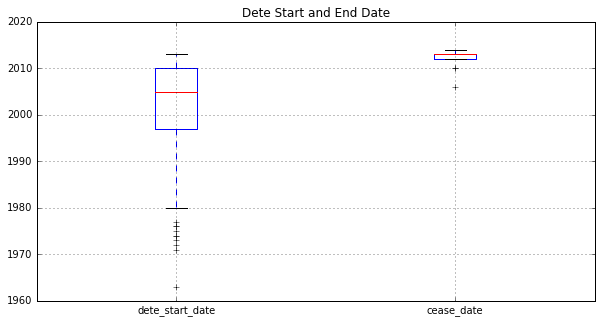

In [18]:
plt.figure(figsize= (10,5))
plt.title('Dete Start and End Date')
start_end_dete.boxplot(column = ['dete_start_date','cease_date'])
plt.show()

In [19]:
tafe_resignations['cease_date'].value_counts().sort_index().to_frame()

,cease_date
2009.0,2
2010.0,68
2011.0,116
2012.0,94
2013.0,55


----
Create a institute_service in dete like that of tafe  

In [20]:
#Now both tafe_resignations and defe_resignations has the # pf years served
dete_resignations['institute_service'] = dete_resignations['cease_date']- dete_resignations['dete_start_date'] 

Create a dissatisfied column for both dete and tafe

In [21]:
def update_vals(cols):
    if pd.isnull(cols):
        return np.nan
    elif cols == '-':
        return False
    else:
        return True
    

In [22]:
#just checking values
tafe_resignations['Contributing Factors. Dissatisfaction'].value_counts(dropna = False)

-                                         277
Contributing Factors. Dissatisfaction      55
NaN                                         8
Name: Contributing Factors. Dissatisfaction, dtype: int64

In [23]:
#apply update_vals to the two columns in tafe_resignations
con_facts = ['Contributing Factors. Dissatisfaction', 'Contributing Factors. Job Dissatisfaction']
t_dissatisfied = tafe_resignations[con_facts].applymap(update_vals)

In [24]:
t_dissatisfied

,Contributing Factors. Dissatisfaction,Contributing Factors. Job Dissatisfaction
3,False,False
4,False,False
5,False,False
6,False,False
7,False,False
8,False,False
9,False,False
10,False,False
13,False,False
14,True,True


In [25]:
#if any value in dissatisfied is true, then = true
#create a new column in tafe_resignations
tafe_resignations['dissatisfied'] = t_dissatisfied.any(axis = 1,skipna = False).copy()

In [26]:
tafe_resignations['dissatisfied'].value_counts(dropna = False)

False    241
True      91
NaN        8
Name: dissatisfied, dtype: int64

In [27]:
tafe_resignations['dissatisfied']

3      False
4      False
5      False
6      False
7      False
8      False
9      False
10     False
13     False
14      True
15     False
16       NaN
17      True
18       NaN
19     False
20      True
21     False
22     False
23     False
24     False
26      True
27     False
29     False
32     False
36     False
37     False
39     False
40      True
41     False
42     False
       ...  
659    False
660    False
661     True
665    False
666    False
669    False
670      NaN
671     True
675     True
676    False
677    False
678    False
679    False
681    False
682    False
683    False
684    False
685     True
686    False
688    False
689     True
690    False
691    False
693    False
694    False
696    False
697    False
698    False
699    False
701    False
Name: dissatisfied, Length: 340, dtype: object

In [28]:
#apply update_vals to all the diss_rsn cols in dete_resignations
diss_rsn = ['job_dissatisfaction','dissatisfaction_with_the_department','physical_work_environment',\
'lack_of_recognition','lack_of_job_security','work_location','employment_conditions',\
'work_life_balance','workload']
d_dissatisfied = dete_resignations[diss_rsn].applymap(update_vals)

In [29]:
#if any value in dissatisfied is true, then = true
#assign it to dete_resignations_up
dete_resignations['dissatisfied'] = d_dissatisfied.any(axis= 1, skipna = False).copy()

In [30]:
dete_resignations['dissatisfied'].value_counts()

True    311
Name: dissatisfied, dtype: int64

In [31]:
tafe_resignations

,id,Institute,WorkArea,cease_date,separationtype,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,...,Contributing Factors. Travel,Contributing Factors. Other,Contributing Factors. NONE,gender,CurrentAge. Current Age,employment_status,position,institute_service,role_service,dissatisfied
3,6.341399e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,-,...,Travel,-,-,NaN,NaN,NaN,NaN,NaN,NaN,False
4,6.341466e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,...,-,-,-,Male,41 45,Permanent Full-time,Teacher (including LVT),3-4,3-4,False
5,6.341475e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,-,-,-,-,...,-,Other,-,Female,56 or older,Contract/casual,Teacher (including LVT),7-10,7-10,False
6,6.341520e+17,Barrier Reef Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,Career Move - Private Sector,-,-,Maternity/Family,...,-,Other,-,Male,20 or younger,Temporary Full-time,Administration (AO),3-4,3-4,False
7,6.341537e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,-,-,-,-,...,-,Other,-,Male,46 50,Permanent Full-time,Teacher (including LVT),3-4,3-4,False
8,6.341579e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2009.0,Resignation,-,-,-,-,-,...,-,Other,-,Female,36 40,Temporary Full-time,Tutor,3-4,3-4,False
9,6.341588e+17,Barrier Reef Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,Career Move - Public Sector,-,-,-,-,...,-,Other,-,Female,21 25,Permanent Full-time,Administration (AO),1-2,1-2,False
10,6.341588e+17,Barrier Reef Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,Career Move - Public Sector,-,-,-,-,...,-,-,-,Female,41 45,Temporary Part-time,Administration (AO),Less than 1 year,Less than 1 year,False
13,6.341725e+17,Barrier Reef Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,...,-,-,-,Female,31 35,Temporary Full-time,Administration (AO),11-20,Less than 1 year,False
14,6.341726e+17,Central Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,...,-,-,-,Female,31 35,Permanent Part-time,Teacher (including LVT),7-10,7-10,True


In [32]:
tafe_resignations_up = tafe_resignations.copy()
dete_resignations_up = dete_resignations.copy()

Create 'TAFE' & 'DETE' to recognize institution name  
Merge tafe_resignations_up and dete_resignations_up 

In [33]:
tafe_resignations_up['institute'] = 'TAFE'
dete_resignations_up['institute'] = 'DETE'

In [34]:
combined = pd.merge(tafe_resignations_up, dete_resignations_up, how ='outer')

In [35]:
combined.shape

(651, 54)

institute_service columns is very disorganized.  
bin the number of years served into categories 

**New**: Less than 3 years at a company  
**Experienced**: 3-6 years at a company  
**Established**: 7-10 years at a company  
**Veteran**: 11 or more years at a company  

In [36]:
#change floats to strings
combined['institute_service'] = combined['institute_service'].astype('str')

In [37]:
#extract just the numbers from 0-99
#change back to float
combined['institute_service'] = combined['institute_service'].str.extract(r'([0-9][0-9]?)').astype('float')

/dataquest/system/env/python3/lib/python3.4/site-packages/ipykernel/__main__.py:3: FutureWarning:

currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)



In [38]:
combined['institute_service'].value_counts().sort_index()

0.0      20
1.0     159
2.0      14
3.0      83
4.0      16
5.0      56
6.0      17
7.0      34
8.0       8
9.0      14
10.0      6
11.0     30
12.0      6
13.0      8
14.0      6
15.0      7
16.0      5
17.0      6
18.0      5
19.0      3
20.0     17
21.0      3
22.0      6
23.0      4
24.0      4
25.0      2
26.0      2
27.0      1
28.0      2
29.0      1
30.0      2
31.0      1
32.0      3
33.0      1
34.0      1
35.0      1
36.0      2
38.0      1
39.0      3
41.0      1
42.0      1
49.0      1
Name: institute_service, dtype: int64

In [39]:
#categorize the years served according the their experience
bins = [-1,2,6,10,np.inf]
labels = ['New','Experienced','Established','Veteran']
combined['service_cat'] = pd.cut(combined['institute_service'], bins = bins,labels = labels )

Plot dissatisfication as reason for leaving and employees' experience

In [40]:
combined['dissatisfied'].value_counts(dropna = False)

True     402
False    241
NaN        8
Name: dissatisfied, dtype: int64

In [41]:
#fillna values with True as it occurs most frequently
combined['dissatisfied'] = combined['dissatisfied'].fillna(True)

In [42]:
combined['dissatisfied'].value_counts(dropna = False)

True     410
False    241
Name: dissatisfied, dtype: int64

In [43]:
perc_diss_emp = combined.pivot_table(values ='dissatisfied' ,index= 'service_cat' )
perc_diss_emp

,dissatisfied
service_cat,
New,0.476684
Experienced,0.581395
Established,0.774194
Veteran,0.808824


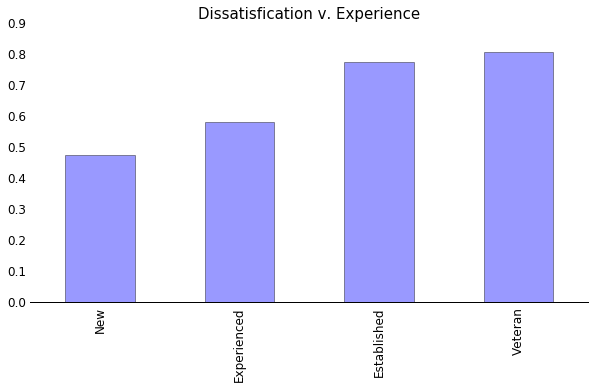

In [44]:
ax = perc_diss_emp.plot(kind ='bar', legend = False, figsize= (10,5),fontsize = 12,alpha = .4)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.tick_params(top = 'off',bottom="off", left="off", right = 'off')
ax.set_title('Dissatisfication v. Experience',fontsize = 15)
ax.set_xlabel('')
plt.show()

clean up the ages columns  
create new column age_range 

In [45]:
#combine the two age columns into one
combined['age_range'] = combined['CurrentAge. Current Age'].combine_first(combined['age'])

In [46]:
combined['age_range']

0                NaN
1             41  45
2        56 or older
3      20 or younger
4             46  50
5             36  40
6             21  25
7             41  45
8             31  35
9             31  35
10            46  50
11               NaN
12            31  35
13               NaN
14               NaN
15               NaN
16               NaN
17            26  30
18            26  30
19            31  35
20               NaN
21       56 or older
22            31  35
23            46  50
24               NaN
25               NaN
26               NaN
27            26  30
28            36  40
29            31  35
           ...      
621            41-45
622      61 or older
623            46-50
624            31-35
625            41-45
626            41-45
627            26-30
628            46-50
629      61 or older
630            36-40
631            41-45
632            21-25
633            41-45
634            41-45
635            51-55
636            36-40
637          

In [47]:
#replace double spaces with -
combined['age_range'] = combined['age_range'].str.replace('  ','-')

In [48]:
combined['age_range'].value_counts()

41-45            93
46-50            81
36-40            73
51-55            71
26-30            67
21-25            62
31-35            61
56 or older      29
56-60            26
61 or older      23
20 or younger    10
Name: age_range, dtype: int64

In [49]:
#rename 20 or younger to 0-20
combined['age_range'] = combined['age_range'].str.replace('20 or younger','0-20')

In [50]:
#rename 56 or older, 56-60, 61 or older to just 56-100
combined['age_range'] = combined['age_range'].replace(['56 or older','56-60','61 or older'], '56 +')

,age_range
0-20,10
21-25,62
26-30,67
31-35,61
36-40,73
41-45,93
46-50,81
51-55,71
56 +,78


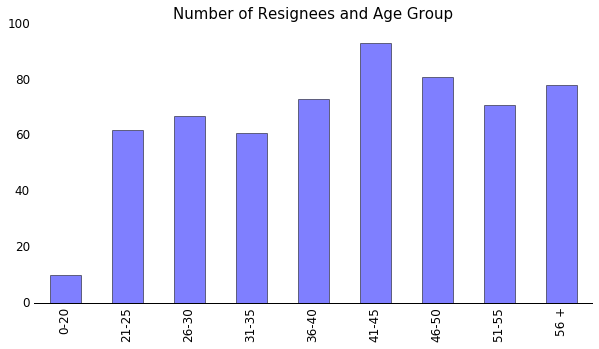

In [51]:
age_count = combined['age_range'].value_counts().sort_index().to_frame()
ax = age_count.plot(kind='bar',figsize = (10,5), legend = False,alpha = .5,fontsize =12)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.tick_params(top = 'off',bottom="off", left="off", right = 'off')
ax.set_title('Number of Resignees and Age Group', fontsize= 15);
age_count

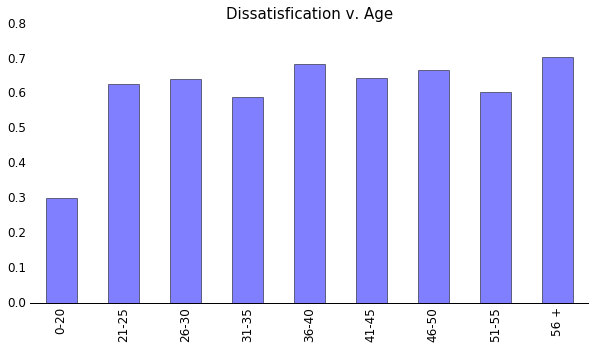

In [52]:
perc_age_diss= combined.pivot_table(values ='dissatisfied' ,index= 'age_range' )
ax = perc_age_diss.plot(kind='bar',legend= False, figsize= (10,5),alpha = .5,fontsize =12)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.tick_params(top = 'off',bottom="off", left="off", right = 'off')
ax.set_title('Dissatisfication v. Age',fontsize = 15)
ax.set_xlabel('')
plt.show()

update values to true and false

In [53]:
combined.isnull().sum()

id                                                       0
Institute                                              311
WorkArea                                               311
cease_date                                              16
separationtype                                           0
Contributing Factors. Career Move - Public Sector      319
Contributing Factors. Career Move - Private Sector     319
Contributing Factors. Career Move - Self-employment    319
Contributing Factors. Ill Health                       319
Contributing Factors. Maternity/Family                 319
Contributing Factors. Dissatisfaction                  319
Contributing Factors. Job Dissatisfaction              319
Contributing Factors. Interpersonal Conflict           319
Contributing Factors. Study                            319
Contributing Factors. Travel                           319
Contributing Factors. Other                            319
Contributing Factors. NONE                             3

In [54]:
vals_to_update = ['Contributing Factors. Career Move - Private Sector ', \
                 'Contributing Factors. Career Move - Self-employment',
                  'Contributing Factors. Career Move - Public Sector ',\
                 'Contributing Factors. Ill Health','Contributing Factors. Maternity/Family',\
                 'Contributing Factors. Interpersonal Conflict','Contributing Factors. Study',\
                 'Contributing Factors. Travel','Contributing Factors. Other',\
                 'Contributing Factors. NONE']

In [55]:
#change '-' to False and rest to True, keep NaN
combined[vals_to_update] = combined[vals_to_update].applymap(update_vals)

In [56]:
combined[vals_to_update]

,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Career Move - Public Sector,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,Contributing Factors. Interpersonal Conflict,Contributing Factors. Study,Contributing Factors. Travel,Contributing Factors. Other,Contributing Factors. NONE
0,False,False,False,False,False,False,False,True,False,False
1,True,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,True,False
3,True,False,False,False,True,False,False,False,True,False
4,False,False,False,False,False,False,False,False,True,False
5,False,False,False,False,False,False,False,False,True,False
6,False,False,True,False,False,False,False,False,True,False
7,False,False,True,False,False,False,False,False,False,False
8,True,False,False,False,False,False,False,False,False,False
9,True,False,False,False,False,False,False,False,False,False


create a new column career_move as the reason for leaving

In [57]:
combined['career_move'] = combined[['Contributing Factors. Career Move - Private Sector ',\
                                  'Contributing Factors. Career Move - Self-employment',\
                                 'Contributing Factors. Career Move - Public Sector ' ]]\
                                .any(axis= 1, skipna = False).copy()

In [68]:
#career reasons of leaving 'career_move_to_public_sector','career_move_to_private_sector','relocation'
sector_to_combine = combined[['career_move_to_public_sector','career_move_to_private_sector','relocation']]\
                    .any(axis= 1,skipna =False).copy()

In [69]:
combined['career_move'] = combined['career_move'].combine_first(sector_to_combine)

create a new column personal_problem as the reason for leaving

In [98]:
personal_problems = ['Contributing Factors. Ill Health', 'Contributing Factors. Maternity/Family',\
                    'Contributing Factors. Interpersonal Conflict']

In [104]:
combined['personal_problems']=\
combined[personal_problems].any(axis = 1, skipna = False).copy()

In [105]:
personal_to_combine = combined[['interpersonal_conflicts','ill_health']].any(axis = 1, skipna= False).copy() 

In [106]:
combined['personal_problems']=\
combined['personal_problems'].combine_first(personal_to_combine)

create new column study/travel

In [121]:
combined['study_travel'] = combined[['Contributing Factors. Travel','Contributing Factors. Study']].any(axis = 1,skipna = False).copy()

In [122]:
combined['study_travel'] = combined['study_travel'].combine_first(combined['study/travel'])

In [124]:
combined['study_travel'].value_counts(dropna= False)

False    586
True      57
NaN        8
Name: study_travel, dtype: int64

create new column other_reason

In [134]:
combined['other_reason'] = \
combined[['Contributing Factors. NONE','Contributing Factors. Other']].any(axis= 1, skipna= False).copy()

In [135]:
other_to_combine =\
combined[['traumatic_incident', 'none_of_the_above']].any(axis= 1,skipna = False).copy()

In [137]:
combined['other_reason'] = combined['other_reason'].combine_first(other_to_combine)

In [141]:
combined['other_reason'].value_counts(dropna= False)

False    502
True     141
NaN        8
Name: other_reason, dtype: int64

check for null values in the all the columns where it is a reason for leaving  
fill in the missing values with 'False'

In [138]:
reason_leaving =['other_reason','study_travel','personal_problems','career_move','dissatisfied']

In [152]:
combined[reason_leaving].isnull().sum()

other_reason         8
study_travel         8
personal_problems    8
career_move          8
dissatisfied         8
dtype: int64

In [157]:
combined[reason_leaving] = combined[reason_leaving].fillna(False)

In [158]:
combined.isnull().sum()

id                                                       0
Institute                                              311
WorkArea                                               311
cease_date                                              16
separationtype                                           0
Contributing Factors. Career Move - Public Sector      319
Contributing Factors. Career Move - Private Sector     319
Contributing Factors. Career Move - Self-employment    319
Contributing Factors. Ill Health                       319
Contributing Factors. Maternity/Family                 319
Contributing Factors. Dissatisfaction                  319
Contributing Factors. Job Dissatisfaction              319
Contributing Factors. Interpersonal Conflict           319
Contributing Factors. Study                            319
Contributing Factors. Travel                           319
Contributing Factors. Other                            319
Contributing Factors. NONE                             3

drop all the columns, keep if values in columns > 500 are non-null

In [159]:
#set thresh to 500
#create combined_updated
combined_updated = combined.dropna(thresh = 500, axis = 1)

In [161]:
combined_updated.columns

Index(['id', 'cease_date', 'separationtype', 'gender', 'employment_status',
       'position', 'institute_service', 'dissatisfied', 'institute',
       'service_cat', 'age_range', 'career_move', 'personal_problems',
       'study_travel', 'other_reason'],
      dtype='object')

plot the reasons for leaving on the experience  
plot the reasons for leaving on the age-range  
plot the reasons for leaving on the two institutes

In [178]:
rl = combined_updated.pivot_table(values = reason_leaving ,index= 'service_cat' )
rl

,career_move,dissatisfied,other_reason,personal_problems,study_travel
service_cat,,,,,
New,0.440415,0.476684,0.243523,0.119171,0.119171
Experienced,0.412791,0.581395,0.232558,0.162791,0.069767
Established,0.419355,0.774194,0.145161,0.145161,0.080645
Veteran,0.272059,0.808824,0.220588,0.183824,0.073529


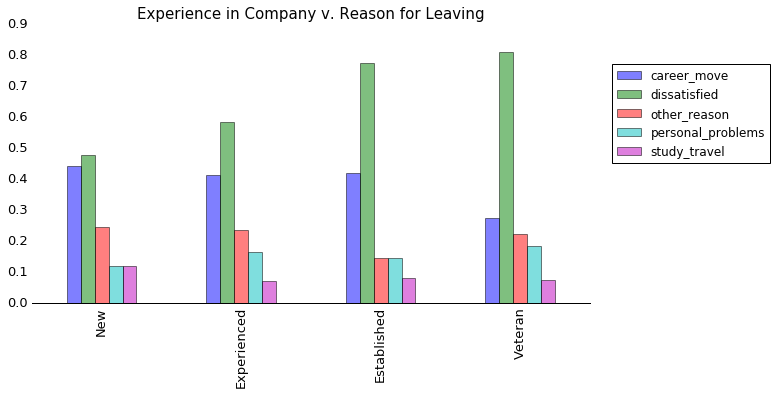

In [204]:
ax = rl.plot(kind= 'bar', figsize = (10,5), fontsize = 13,alpha = .5)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.tick_params(top = 'off',bottom="off", left="off", right = 'off')
ax.set_xlabel('')
ax.set_title('Experience in Company v. Reason for Leaving', fontsize= 15)
ax.legend(loc=(1.04,.5));

In [196]:
ar = combined_updated.pivot_table(values = reason_leaving ,index= 'age_range' )
ar

,career_move,dissatisfied,other_reason,personal_problems,study_travel
age_range,,,,,
0-20,0.300000,0.300000,0.300000,0.300000,0.100000
21-25,0.500000,0.629032,0.193548,0.064516,0.258065
26-30,0.522388,0.641791,0.208955,0.044776,0.194030
31-35,0.409836,0.590164,0.180328,0.098361,0.081967
36-40,0.424658,0.684932,0.178082,0.136986,0.068493
41-45,0.408602,0.645161,0.182796,0.129032,0.021505
46-50,0.444444,0.666667,0.246914,0.172840,0.037037
51-55,0.253521,0.605634,0.253521,0.225352,0.084507
56 +,0.141026,0.705128,0.320513,0.230769,0.038462


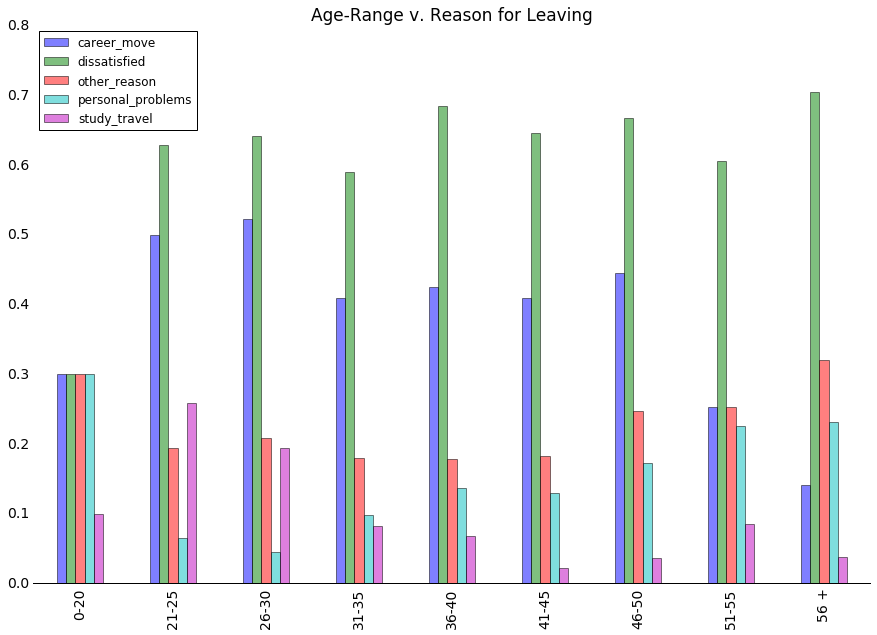

In [208]:
ax = ar.plot(kind='bar',figsize= (15,10), fontsize= 14,alpha = .5)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.tick_params(top = 'off',bottom="off", left="off", right = 'off')
ax.set_xlabel('')
ax.set_title('Age-Range v. Reason for Leaving',fontsize= 17);

In [219]:
inst = combined_updated.pivot_table(values = reason_leaving ,index= 'institute' )
inst

,career_move,dissatisfied,other_reason,personal_problems,study_travel
institute,,,,,
DETE,0.282958,1.000000,0.125402,0.122186,0.083601
TAFE,0.452941,0.267647,0.300000,0.176471,0.091176


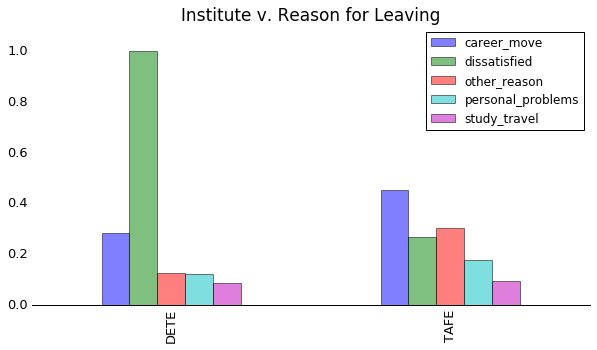

In [225]:
ax = inst.plot(kind='bar',fontsize = 13,figsize =(10,5),alpha =.5, ylim= (0,1.1))
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.tick_params(top = 'off',bottom="off", left="off", right = 'off')
ax.set_xlabel('')
ax.set_title('Institute v. Reason for Leaving',fontsize= 17);